In [609]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [610]:
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')

In [611]:
movies_df.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [612]:
movie_rating = pd.merge(movies_df, ratings_df,on='movieId')

In [613]:
cols_2_drop = ['title','timestamp','userId','rating']
movie_rating_clean = movie_rating.drop(cols_2_drop,axis=1)

In [614]:
movie_rating_clean['movieId'].unique()

array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64)

In [615]:
import ast
from itertools import combinations

In [616]:
# movie_rating_clean['genre_list'] = movie_rating_clean['genres'].apply(lambda x: [x])

In [617]:
# movie_rating_clean.drop('genres', axis=1, inplace=True)

In [618]:
movie_rating_clean.head()

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,1,Adventure|Animation|Children|Comedy|Fantasy
2,1,Adventure|Animation|Children|Comedy|Fantasy
3,1,Adventure|Animation|Children|Comedy|Fantasy
4,1,Adventure|Animation|Children|Comedy|Fantasy


In [619]:
movie_rating_clean.loc[movie_rating_clean.movieId==25].genres

1314    Drama|Romance
1315    Drama|Romance
1316    Drama|Romance
1317    Drama|Romance
1318    Drama|Romance
            ...      
1385    Drama|Romance
1386    Drama|Romance
1387    Drama|Romance
1388    Drama|Romance
1389    Drama|Romance
Name: genres, Length: 76, dtype: object

In [620]:
movie_rating_clean.drop_duplicates('movieId', keep='first', inplace=True)

In [621]:
# movie_rating_clean.set_index('movieId',inplace=True)

In [622]:
movie_rating_clean.reset_index(drop=True,inplace=True)

In [623]:
movie_rating_clean.tail()

,movieId,genres
9719,193581,Action|Animation|Comedy|Fantasy
9720,193583,Animation|Comedy|Fantasy
9721,193585,Drama
9722,193587,Action|Animation
9723,193609,Comedy


In [624]:
move_id_genre_df = movie_rating_clean.copy()

In [625]:
movie_rating_clean = movie_rating_clean.drop('movieId', axis=1) # modelling data
movie_rating_clean['genres'] = movie_rating_clean['genres'].apply(lambda x :x.replace('|',',').lower())

In [626]:
movie_rating_clean.head()

,genres
0,"adventure,animation,children,comedy,fantasy"
1,"adventure,children,fantasy"
2,"comedy,romance"
3,"comedy,drama,romance"
4,comedy


In [176]:
merged_df = move_id_genre_df.join(movies_df, how='inner',lsuffix='movie_')

In [179]:
merged_df.drop(['movieIdmovie_','genresmovie_'], axis=1, inplace=True)

In [246]:
merged_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [372]:
merged_df.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9719                                    Documentary
9720                      Action|Adventure|Thriller
9721                          Action|Crime|Thriller
9722                                  Action|Sci-Fi
9723                             Comedy|Crime|Drama
Name: genres, Length: 9724, dtype: object

In [389]:
merged_df['genres'] = merged_df['genres'].apply(lambda x :x.replace('|',',').lower())

In [444]:
gener_list = merged_df['genres'].to_list()

In [447]:
gener_list = ''.join(gener_list).split(',')

In [448]:
from collections import Counter
count_dict = dict(Counter(gener_list))

<Axes: >

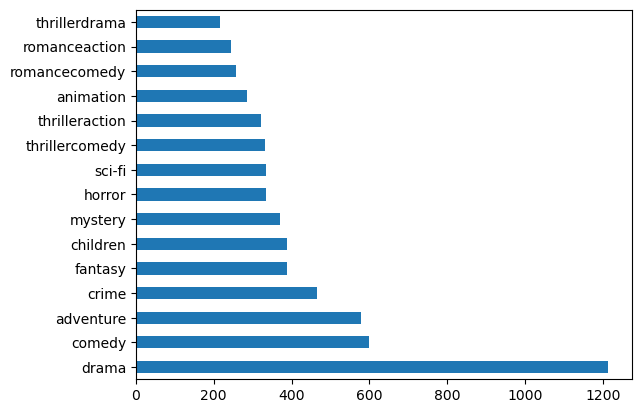

In [458]:
pd.Series(count_dict).sort_values(ascending=False).head(15).plot(kind='barh')

In [544]:
genres_to_filter = pd.Series(count_dict).sort_values(ascending=False)
new_cols = genres_to_filter.head(60).keys().to_list()

In [545]:
new_cols

['drama',
 'comedy',
 'adventure',
 'crime',
 'fantasy',
 'children',
 'mystery',
 'horror',
 'sci-fi',
 'thrillercomedy',
 'thrilleraction',
 'animation',
 'romancecomedy',
 'romanceaction',
 'thrillerdrama',
 'romance',
 'dramacomedy',
 'dramaaction',
 'romancedrama',
 'sci-fiaction',
 'dramadrama',
 'thrilleradventure',
 'musical',
 'thrillercrime',
 'sci-ficomedy',
 'thriller',
 'romanceadventure',
 'comedyaction',
 'romancecrime',
 'fantasyaction',
 'comedycomedy',
 'warcomedy',
 'thrillerhorror',
 'sci-fidrama',
 'waraction',
 'dramaadventure',
 'fantasycomedy',
 'fantasydrama',
 'wardrama',
 'dramacrime',
 'film-noir',
 'sci-fiadventure',
 'crimeaction',
 'musicalcomedy',
 'thrillerdramacomedy',
 'horrorcomedy',
 'thrillerdramaaction',
 'romanceanimation',
 'crimecomedy',
 'thrilleranimation',
 'romancecomedycomedy',
 'imaxaction',
 'imaxcomedy',
 'romancedramacomedy',
 'musicalaction',
 'comedyadventure',
 'fantasyadventure',
 'sci-fihorror',
 'thrillerchildren',
 'comedydrama'

In [584]:
movie_rating_clean.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy


### Modelling using TFIDF vectorizer

In [627]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(token_pattern=',?\\s*\\w+\\s*(?:,|$)', vocabulary=new_cols)
tfidf_genres = vectorizer.fit_transform(movie_rating_clean.genres)

In [628]:
vectorizer.get_feature_names_out()

array(['drama', 'comedy', 'adventure', 'crime', 'fantasy', 'children',
       'mystery', 'horror', 'sci-fi', 'thrillercomedy', 'thrilleraction',
       'animation', 'romancecomedy', 'romanceaction', 'thrillerdrama',
       'romance', 'dramacomedy', 'dramaaction', 'romancedrama',
       'sci-fiaction', 'dramadrama', 'thrilleradventure', 'musical',
       'thrillercrime', 'sci-ficomedy', 'thriller', 'romanceadventure',
       'comedyaction', 'romancecrime', 'fantasyaction', 'comedycomedy',
       'warcomedy', 'thrillerhorror', 'sci-fidrama', 'waraction',
       'dramaadventure', 'fantasycomedy', 'fantasydrama', 'wardrama',
       'dramacrime', 'film-noir', 'sci-fiadventure', 'crimeaction',
       'musicalcomedy', 'thrillerdramacomedy', 'horrorcomedy',
       'thrillerdramaaction', 'romanceanimation', 'crimecomedy',
       'thrilleranimation', 'romancecomedycomedy', 'imaxaction',
       'imaxcomedy', 'romancedramacomedy', 'musicalaction',
       'comedyadventure', 'fantasyadventure', 'sci

In [629]:
movie_genres_df = pd.DataFrame(tfidf_genres.todense(), columns=new_cols)

In [630]:
movie_genres_df.tail()

,drama,comedy,adventure,crime,fantasy,children,mystery,horror,sci-fi,thrillercomedy,...,romancecomedycomedy,imaxaction,imaxcomedy,romancedramacomedy,musicalaction,comedyadventure,fantasyadventure,sci-fihorror,thrillerchildren,comedydrama
9719,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [631]:
movie_genres_df.keys()

Index(['drama', 'comedy', 'adventure', 'crime', 'fantasy', 'children',
       'mystery', 'horror', 'sci-fi', 'thrillercomedy', 'thrilleraction',
       'animation', 'romancecomedy', 'romanceaction', 'thrillerdrama',
       'romance', 'dramacomedy', 'dramaaction', 'romancedrama', 'sci-fiaction',
       'dramadrama', 'thrilleradventure', 'musical', 'thrillercrime',
       'sci-ficomedy', 'thriller', 'romanceadventure', 'comedyaction',
       'romancecrime', 'fantasyaction', 'comedycomedy', 'warcomedy',
       'thrillerhorror', 'sci-fidrama', 'waraction', 'dramaadventure',
       'fantasycomedy', 'fantasydrama', 'wardrama', 'dramacrime', 'film-noir',
       'sci-fiadventure', 'crimeaction', 'musicalcomedy',
       'thrillerdramacomedy', 'horrorcomedy', 'thrillerdramaaction',
       'romanceanimation', 'crimecomedy', 'thrilleranimation',
       'romancecomedycomedy', 'imaxaction', 'imaxcomedy', 'romancedramacomedy',
       'musicalaction', 'comedyadventure', 'fantasyadventure', 'sci-fihorr

In [565]:
nn_algo_tfidf = NearestNeighbors(metric='cosine')
nn_algo_tfidf.fit(movie_genres_df)

NearestNeighbors(metric='cosine')

### Testing

In [632]:
# Getting the actual title to index
merged_df[merged_df['title'].str.lower().str.contains('park')]

,movieId,title,genres
327,369,Mrs. Parker and the Vicious Circle (1994),drama
418,480,Jurassic Park (1993),"action,adventure,sci-fi,thriller"
575,706,Sunset Park (1996),drama
1106,1439,Meet Wally Sparks (1997),comedy
1164,1544,"Lost World: Jurassic Park, The (1997)","action,adventure,sci-fi,thriller"
2028,2700,"South Park: Bigger, Longer and Uncut (1999)","animation,comedy,musical"
2155,2870,Barefoot in the Park (1967),comedy
2168,2884,Dog Park (1998),"comedy,romance"
2325,3079,Mansfield Park (1999),"comedy,drama,romance"
3409,4638,Jurassic Park III (2001),"action,adventure,sci-fi,thriller"


In [646]:
#get the corresponding genere vectors
watched_movie = movie_genres_df.iloc[1]
watched_movie

drama                  0.0
comedy                 0.0
adventure              0.0
crime                  0.0
fantasy                1.0
children               0.0
mystery                0.0
horror                 0.0
sci-fi                 0.0
thrillercomedy         0.0
thrilleraction         0.0
animation              0.0
romancecomedy          0.0
romanceaction          0.0
thrillerdrama          0.0
romance                0.0
dramacomedy            0.0
dramaaction            0.0
romancedrama           0.0
sci-fiaction           0.0
dramadrama             0.0
thrilleradventure      0.0
musical                0.0
thrillercrime          0.0
sci-ficomedy           0.0
thriller               0.0
romanceadventure       0.0
comedyaction           0.0
romancecrime           0.0
fantasyaction          0.0
comedycomedy           0.0
warcomedy              0.0
thrillerhorror         0.0
sci-fidrama            0.0
waraction              0.0
dramaadventure         0.0
fantasycomedy          0.0
f

In [634]:
distance,neighbors_tfidf = nn_algo_tfidf.kneighbors([watched_movie],n_neighbors=5+1)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [635]:
merged_df.iloc[neighbors_tfidf.tolist()[0]]

,movieId,title,genres
2893,3870,Our Town (1940),drama
5896,33493,Star Wars: Episode III - Revenge of the Sith (...,"action,adventure,sci-fi"
7583,86286,Daffy Duck's Quackbusters (1988),"animation,children,comedy,horror"
8681,122882,Mad Max: Fury Road (2015),"action,adventure,sci-fi,thriller"
6394,50740,Seven Up! (1964),documentary
2898,3879,"Art of War, The (2000)","action,thriller"


### Modelling using countvectorizer

In [636]:
from sklearn.feature_extraction.text import CountVectorizer

In [637]:
count_vector = CountVectorizer(vocabulary=new_cols)
count_genere = count_vector.fit_transform(movie_rating_clean['genres'])

In [638]:
count_vector.get_feature_names_out()

array(['drama', 'comedy', 'adventure', 'crime', 'fantasy', 'children',
       'mystery', 'horror', 'sci-fi', 'thrillercomedy', 'thrilleraction',
       'animation', 'romancecomedy', 'romanceaction', 'thrillerdrama',
       'romance', 'dramacomedy', 'dramaaction', 'romancedrama',
       'sci-fiaction', 'dramadrama', 'thrilleradventure', 'musical',
       'thrillercrime', 'sci-ficomedy', 'thriller', 'romanceadventure',
       'comedyaction', 'romancecrime', 'fantasyaction', 'comedycomedy',
       'warcomedy', 'thrillerhorror', 'sci-fidrama', 'waraction',
       'dramaadventure', 'fantasycomedy', 'fantasydrama', 'wardrama',
       'dramacrime', 'film-noir', 'sci-fiadventure', 'crimeaction',
       'musicalcomedy', 'thrillerdramacomedy', 'horrorcomedy',
       'thrillerdramaaction', 'romanceanimation', 'crimecomedy',
       'thrilleranimation', 'romancecomedycomedy', 'imaxaction',
       'imaxcomedy', 'romancedramacomedy', 'musicalaction',
       'comedyadventure', 'fantasyadventure', 'sci

In [639]:
count_df = pd.DataFrame(count_genere.todense(), columns=count_vector.get_feature_names_out())

In [640]:
nn_algo_count = NearestNeighbors(metric='cosine')
nn_algo_count.fit(count_df)

NearestNeighbors(metric='cosine')

### Testing 2

In [649]:
watched_movie_count = count_df.iloc[418]
distance,neighbors_count = nn_algo_count.kneighbors([watched_movie_count],n_neighbors=5+1)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [650]:
merged_df.iloc[neighbors_count.tolist()[0]]

,movieId,title,genres
2140,2848,Othello (Tragedy of Othello: The Moor of Venic...,drama
1052,1367,101 Dalmatians (1996),"adventure,children,comedy"
8102,100487,Beautiful Creatures (2013),"drama,fantasy,romance"
1056,1373,Star Trek V: The Final Frontier (1989),"action,sci-fi"
3763,5250,Stir Crazy (1980),comedy
9139,147282,What Men Still Talk About (2011),comedy
